# Pandas 3
### Marcelo Leszynski
### Vol 3 Labs
### 9/20/21

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [2]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    
    df = pd.read_csv('college.csv')
    group = df.groupby(['Private'])
    private = group.get_group("Yes")
    public = group.get_group("No")
    
    a1 = private["S.F.Ratio"].mean() >= public["S.F.Ratio"].mean()
    a2 = private["Top10perc"].mean() >= public["Top10perc"].mean()
    a3 = private["Top25perc"].mean() >= public["Top25perc"].mean()
    
    if a1:
        ans1 = private["S.F.Ratio"].describe().values
    else:
        ans1 = public["S.F.Ratio"].describe().values
        
    if a2:
        ans2 = private["Top10perc"].describe().values
    else:
        ans2 = public["Top10perc"].describe().values
    if a3:
        ans3 = private["Top25perc"].describe().values
    else:
        ans3 = public["Top25perc"].describe().values
    return (ans1,ans2,ans3)
        
prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

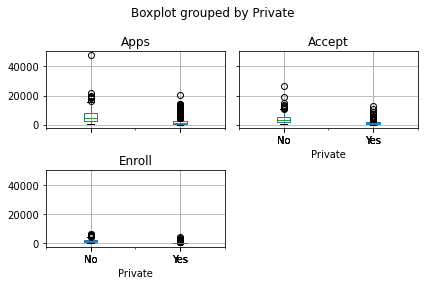

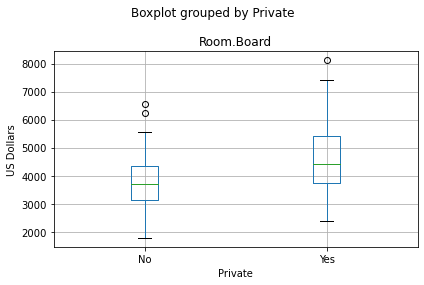

In [3]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    df = pd.read_csv('college.csv')

    df.boxplot(column =["Apps","Accept","Enroll"],by = "Private")
    plt.ylabel("Students")
    plt.tight_layout()
    plt.show()
    print("\n")
    df.boxplot(column=["Room.Board"],by="Private")
    plt.ylabel("US Dollars")
    plt.tight_layout()
    plt.show()

prob2()

# Problem 3

In [4]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in aggregate?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    df = df = pd.read_csv('Ohio_1999.csv')

    x = df.pivot_table(values="Usual Weekly Earnings",index="Race", columns="Sex", aggfunc='sum')
    y = df.pivot_table(values="Usual Hours Worked",index="Race", columns="Sex", aggfunc='sum')
    g = df.pivot_table(values="Usual Hours Worked",index="Race", columns="Sex", aggfunc='mean')
    
    return (1,1),(3,2),(3,1)

prob3()

((1, 1), (3, 2), (3, 1))

In [5]:
prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [6]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which interval has the most workers?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    df = pd.read_csv('Ohio_1999.csv')
    edu = pd.cut(df['Educational Attainment'], [0,39,43,46],right=False)

    e = edu.value_counts()
    ans1 = e.idxmax()
    
    age = pd.qcut(df['Age'],6)

    x = df.pivot_table(values='Usual Hours Worked', index = age, aggfunc='mean')

    ans2 = x.idxmax()
    y = df.pivot_table(values='Yearly Salary', index = [age,edu], aggfunc='mean')
    return ans1, ans2[0],y.sum(axis=1).idxmin()

prob4()

(Interval(39, 43, closed='left'),
 Interval(40.0, 46.0, closed='right'),
 (Interval(15.999, 29.0, closed='right'), Interval(0, 39, closed='left')))

# Problem 5

In [8]:
def prob5():
    """
    Use College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates?
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    df = pd.read_csv("college.csv")
    group = df.groupby(['Private'])
    df["accrate"] = df.Accept/df.Apps
    df['Enrollperc'] = df.Enroll/df.Accept

    ans1 = True
    ans3 = True
    grate = pd.cut(df['Grad.Rate'],[0,20,40,60,80,100,120])
    """ 
    Due to ambiguity in the spec, we partition from 0 to 120 instead of 10 to 120 in order to get the correct
    answer.
    """
    ans2 = False
    
    ans4 = """Private Schools with low Acceptance rates receive far less applicants and spend much more on average than schools with high acceptance rates."""
    
    return(ans1,ans2,ans3,ans4)
    
prob5()

(True,
 False,
 True,
 'Private Schools with low Acceptance rates receive far less applicants and spend much more on average than schools with high acceptance rates.')